In [1]:
%matplotlib inline

In [2]:
weather = pd.read_csv("./data/weather.csv")

In [3]:
# date : datetime으로 형변환
weather['date'] = pd.to_datetime(weather['date'])

In [4]:
# codesum의 " " 은 moderate이므로 'MD'를 넣어준다
weather['codesum'].replace(" ",'MD',inplace=True)

In [5]:
# imputation
for i in weather.columns:
    weather[i] = weather[i].replace('-', np.nan)
    weather[i] = weather[i].replace(' ', np.nan)
    weather[i] = weather[i].replace('M', np.nan)

In [6]:
weather['snowfall'] = weather['snowfall'].replace('T', 0.05)
weather['snowfall'] = weather['snowfall'].replace('  T', 0.05)
weather['preciptotal'] = weather['preciptotal'].replace('  T', 0.005)

In [15]:
# column 전체 형변환
weather["tmax"] = weather["tmax"].astype("float")
weather["tmin"] = weather["tmin"].astype("float")
weather["tavg"] = weather["tavg"].astype("float")
weather["depart"] = weather["depart"].astype("float")
weather["dewpoint"] = weather["dewpoint"].astype("float")
weather["wetbulb"] = weather["wetbulb"].astype("float")
weather["heat"] = weather["heat"].astype("float")
weather["cool"] = weather["cool"].astype("float")
weather['preciptotal'] = weather["preciptotal"].astype("float")
weather['snowfall'] = weather["snowfall"].astype("float")
weather["stnpressure"] = weather["stnpressure"].astype("float")
weather["sealevel"] = weather["sealevel"].astype("float")
weather["resultspeed"] = weather["resultspeed"].astype("float")
weather["resultdir"] = weather["resultdir"].astype("float")
weather["avgspeed"] = weather["avgspeed"].astype("float")

In [8]:
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,NaN,NaN,MD,NaN,0.00,29.90,29.99,4.5,3.0,5.3
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32.0,41.0,18.0,0.0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,1.0,9.3
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0644,1738,MD,0.0,0.00,29.78,30.28,10.6,36.0,11.2
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34.0,20.9
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,NaN,NaN,MD,0.0,0.00,29.57,30.27,10.5,36.0,11.2


In [176]:
# weather와 key merge : station별 store별 날씨
df = key.merge(wth)

In [19]:
year = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').year for i in range(len(weather))]
weather['year'] = year

In [20]:
month = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').month for i in range(len(weather))]
weather['month'] = month

In [21]:
day = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').day for i in range(len(weather))]
weather['day'] = day

In [12]:
weather.to_csv("weather_imputation.csv", index=False)

In [180]:
df.to_csv("KeyWeather_datesliced.csv",index=False)

In [303]:
wth2 = weather.dropna(how='any')
len(weather) , len(wth2), len(weather) - len(wth2)

(20517, 8763, 11754)

In [ ]:
# column별 NaN갯수 파악

In [ ]:
# 연도별 월별 각 column 특징값 파악

In [134]:
station5 = df.loc[df['station_nbr']==5,:]

In [159]:
np.nan in station5.tmax.values 

False

In [194]:
station5_1309 = station5[station5['tmax'].notna()]

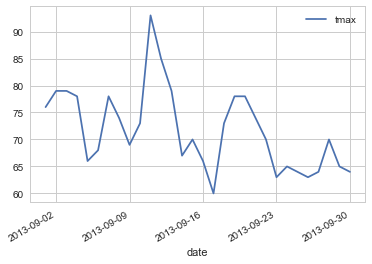

In [196]:
station5.plot(x='date', y='tmax')
plt.show()

20517
entire null count by columns
station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 906 ( 4.42 % )
tmin : 908 ( 4.43 % )
tavg : 912 ( 4.45 % )
depart : 11511 ( 56.1 % )
dewpoint : 666 ( 3.25 % )
wetbulb : 1252 ( 6.1 % )
heat : 1469 ( 7.16 % )
cool : 1469 ( 7.16 % )
sunrise : 9656 ( 47.06 % )
sunset : 9656 ( 47.06 % )
codesum : 0 ( 0.0 % )
snowfall : 7224 ( 35.21 % )
preciptotal : 860 ( 4.19 % )
stnpressure : 929 ( 4.53 % )
sealevel : 1724 ( 8.4 % )
resultspeed : 589 ( 2.87 % )
resultdir : 589 ( 2.87 % )
avgspeed : 875 ( 4.26 % )


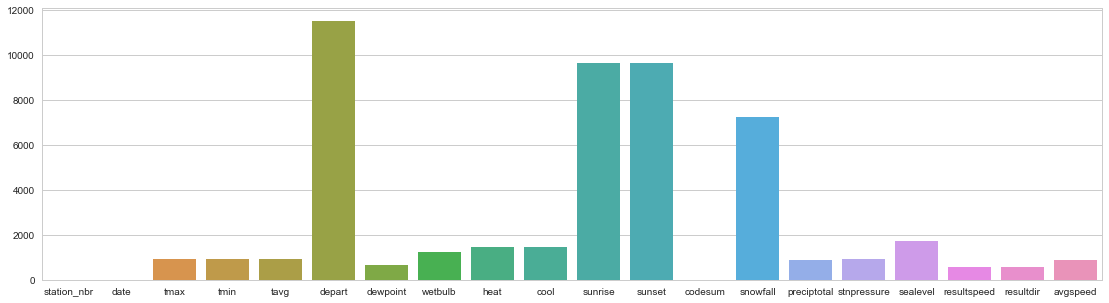

In [289]:
print(len(weather))
print("entire null count by columns")
dic = {}
for i in weather.columns:
    count_null = weather[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / 20517 * 100),2),"%",")")
    
    dic[i] = count_null

plt.figure(figsize=(19,5))    
sns.barplot(x=list(dic.keys()), y=list(dic.values()))
plt.show()

In [11]:
weather.describe()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,20517.000000,19611.000000,19609.000000,19048.000000,9006.000000,19851.000000,19265.000000,19048.000000,19048.000000,19588.000000,18793.000000,19928.000000,19928.000000,19642.000000
mean,10.549057,71.621131,50.654546,61.240130,1.363091,47.270918,53.888243,9.704536,5.944666,29.162770,30.009160,6.468326,18.729928,7.914077
std,5.768533,19.847451,19.139055,19.194357,7.646759,19.400495,17.017772,13.843873,7.834796,1.245414,0.191134,4.192577,9.675662,3.933458
min,1.000000,-11.000000,-21.000000,-16.000000,-35.000000,-24.000000,-15.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,6.000000,59.000000,37.000000,48.000000,-3.000000,33.000000,42.000000,0.000000,0.000000,29.110000,29.890000,3.200000,13.000000,5.100000
50%,11.000000,76.000000,53.000000,65.000000,2.000000,51.000000,57.000000,0.000000,0.000000,29.410000,30.000000,5.700000,18.000000,7.300000
75%,16.000000,87.000000,67.000000,77.000000,6.000000,64.000000,68.000000,17.000000,12.000000,29.780000,30.130000,8.900000,26.000000,10.100000
max,20.000000,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,30.610000,30.800000,28.400000,36.000000,28.700000


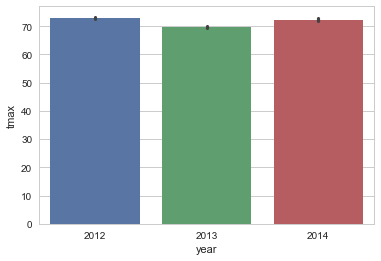

In [22]:
sns.barplot(x='year', y="tmax", data=weather)
plt.show()

연도별로 온도의 편차는 크지 않다.

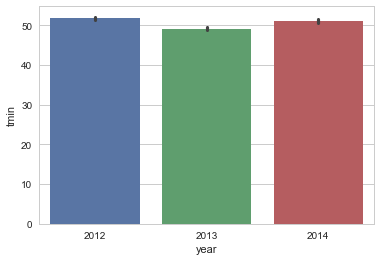

In [24]:
sns.barplot(x='year', y="tmin", data=weather)
plt.show()

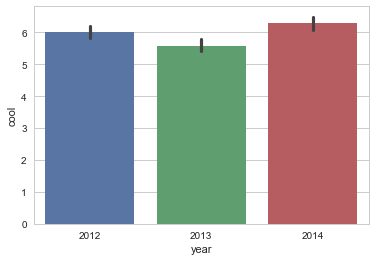

In [28]:
sns.barplot(x='year', y="cool", data=weather)
plt.show()

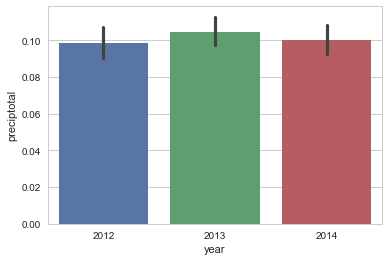

In [30]:
sns.barplot(x='year', y="preciptotal", data=weather)
plt.show()

In [31]:
station = weather[weather['station_nbr']==1]

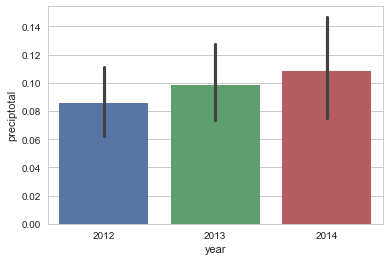

In [33]:
sns.barplot(x='year', y="preciptotal", data=station)
plt.show()

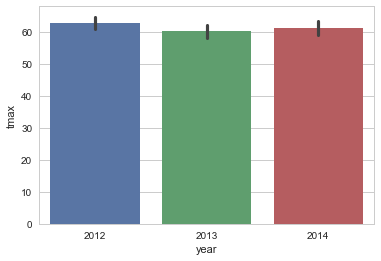

In [34]:
sns.barplot(x='year', y="tmax", data=station)
plt.show()

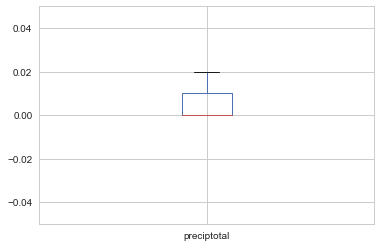

In [42]:
weather.preciptotal.plot.box()
plt.ylim(-0.05,0.05)
plt.show()

In [44]:
weather.preciptotal[weather.preciptotal > 0.005].min()

0.01